# 교차 검증과 그리드 서치

## Grid search 란 
- 모델에게 가장 적합한 하이퍼 파라미터를 찾기 

## 하이퍼 파라미터 (hyper parameter, 초매개변수)의 개념
- 모델을 생성할 때, 사용자가 직접 설정하는 변수가 사전적 정의이다. 

- 파라미터와 하이퍼 파라미터의 차이 : 파라미터(parameter, 매개변수)는 학습 과정에서 생성되는 변수

## Hyper parameter tuning /Hyper parameter optimization
Grid search 와 같이 모델의 하이퍼 파라미터를 조정하고 찾는 과정을

## "Hyper parameter optimization" 유사한 다른 방법들

### 랜덤 서치 random search
- 그리드 서치는 말그대로 모든 경우를 테이블로 만든뒤 격자로 탐색하는 방식에 해당한다면, 랜덤 서치는 하이퍼 파라미터 값을 랜덤하게 넣어보고 그중 우수한 값을 보인 하이퍼 파라미터를 활용해 모델을 생성한다는 것이다.

- 랜덤 서치가 더 효율적이라는 주장
>* 불필요한 탐색 횟수를 줄인다.
>* 그리드 서치는 우리가 딕셔너리에 지정한 모든 값을 다 탐색해야만 한다. 이는 사람이 임의로 정한 값이기 때문에, 어떤 값이 효과적일지는 알 수 없고, 쨌든 입력은 되었으니 한번씩 모델은 다 생성되어야 하는 상황
>* 랜덤 서치는 위와 같은 상황을 방지한다. 랜덤하게 숫자를 넣은 뒤, 정해진 간격(grid) 사이에 위치한 값들에 대해서도 확률적으로 탐색이 가능하므로, 최적 hyperparameter 값을 더 빨리 찾을 수 있다. 

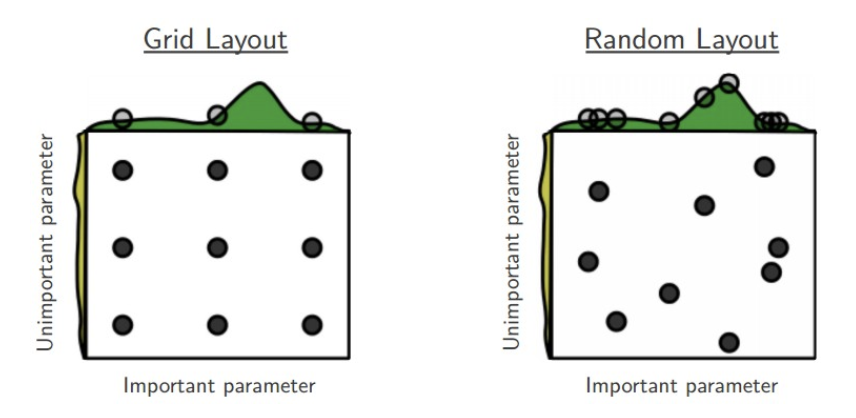
- 실제로 논문에서 랜덤 서치가 그리드 서치보다 더 성능이 좋은 것을 입증해냄.

### Bayesian Optimization
- [참고]http://research.sualab.com/introduction/practice/2019/02/19/bayesian-optimization-overview-1.html

## [원본 소스]검증 세트

In [22]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine-date')

In [23]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [24]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [25]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [26]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


# 교차검증

## 교차검증 정의
- 교차검증이란 모델 학습 시 데이터를 훈련용과 검증용으로 교차하여 선택하는 방법

## 교차검증의 장단점

 | 장점 | 단점 | 
 | :--- | :--- |  
 | 특정 데이터셋에 대한 과적합 방지	 | 모델 훈련 및 평가 소요시간 증가(반복 학습 횟수 증가) | 
 | 더욱 일반화된 모델 생성 가능 |  | 
 | 데이터셋 규모가 적을 시 과소적합 방지 |  | 

## 교차검증의 종류

### Hold-out Cross-Validation
- 특정 비율로 train/test data를 1회 분할하는 방법론
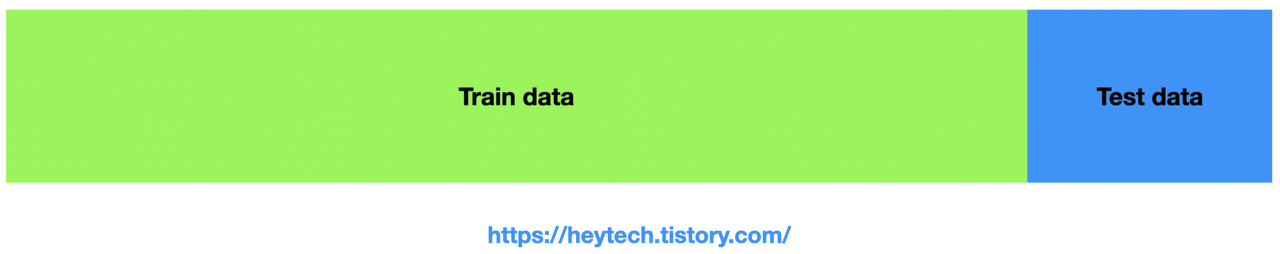

### K-Fold Cross-Validation

#### 정의 
- 전체 데이터셋을 K개의 fold로 나누어 K번 다른 fold 1개를 test data로, 나머지 (K-1)개의 fold를 train data로 분할하는 과정을 반복함으로써 train 및 test data를 교차 변경하는 방법론

#### 절차
① 전체 데이터를 K개 fold로 분할
② 분할된 fold 중 test data로 할당된 적이 없는 fold 1개를 test data로 할당
③ 위 ② 과정을 K번 반복
④ K개의 모델 성능 평가 결괏값을 평균 내어 최종 결괏값으로 활용

- 예시: k = 5인 경우(그림 2 참고)
>- 전체 데이터셋의 20%을 test data, 나머지 80%를 train data 할당
>- 5회에 걸쳐 위의 비율로 전체 데이터셋이 train/test에 사용되도록 교차 변경
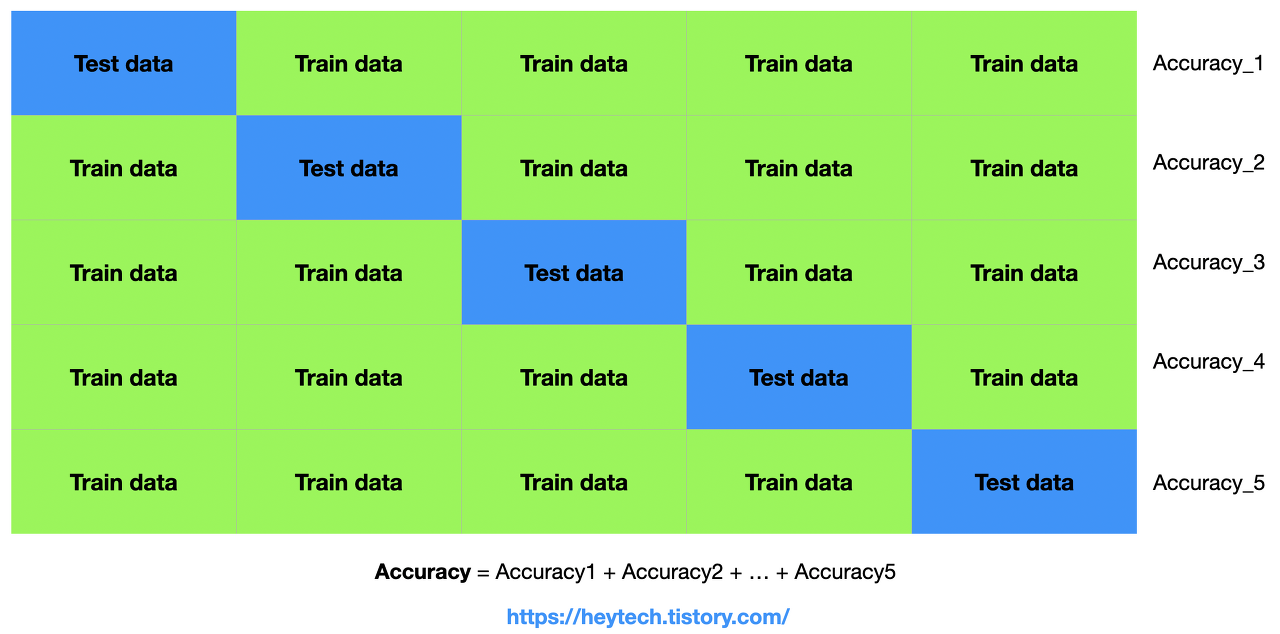

#### 특징
- K는 하이퍼파라미터로서 주로 5~10 fold 사용
- 최적의 K 값을 찾기 위한 실험적 검증 필요
- 가장 일반적인 교차검증 방법론

#### 장점
- 모든 데이터를 train 및 test에 활용 → 과적합/과소적합 탐지 및 더욱 일반화된 모델 생성 가능

#### 단점
- 아래와 같은 경우에는 CV 수행 시 오히려 모델 성능이 악화될 수 있습니다[1].

>- 순서가 고려된 데이터가 shuffle 되어 있지 않은 경우
>- 데이터 불균형(Data Imbalance) → 층화 교차검증(Stratified K-fold CV)을 통해 보완
>- 각기 다른 fold에 같은 데이터(i.e., duplicate)가 존재할 경우
>- Natural Group(e.g., 같은 사용자/머신 데이터) 데이터가 여러 fold에 shuffle 된 경우

### Leave-p-Out Cross-Validation(LpOCV)
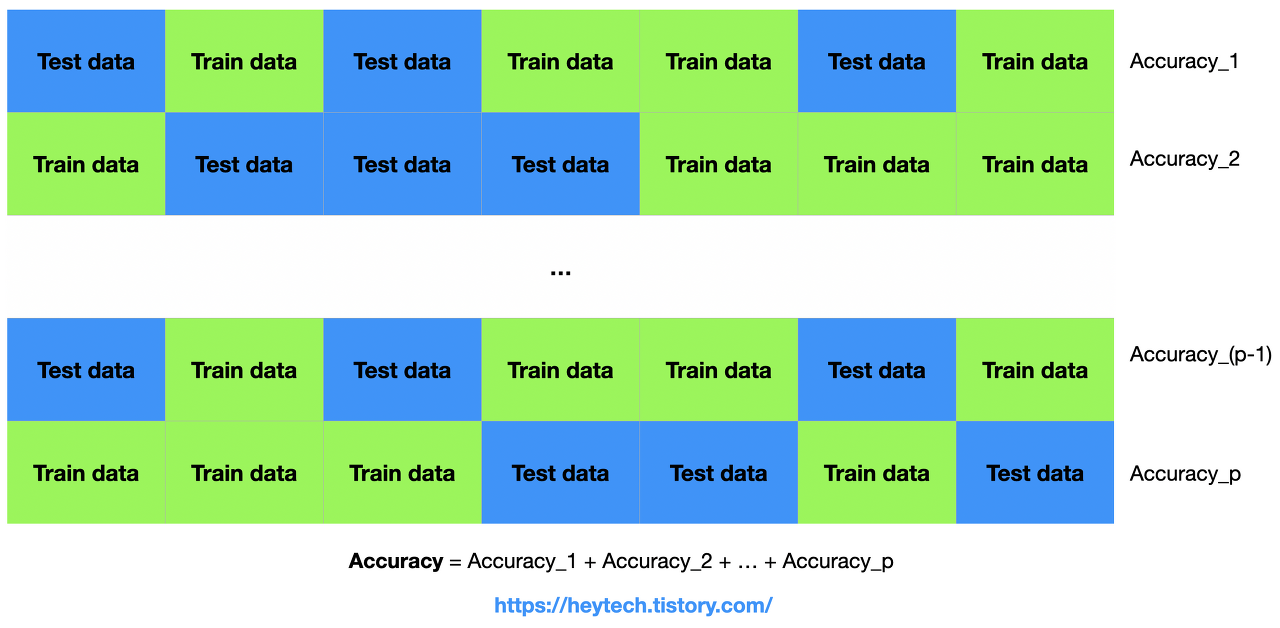

#### 정의
- 전체 데이터 N개 중에서 p개의 샘플을 선택하여 모델 검증에 활용하는 방법론

#### 훈련/검증 iteration 횟수(test data 조합 개수)
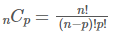
 

#### 특징
- 훈련/검증 iteration 결과들을 평균 내어 최종 결괏값으로 활용
- iteration 횟수가 증가함에 따라 연산 소요 시간 및 비용 증가

### Leave-One-Out CV(LOOCV)
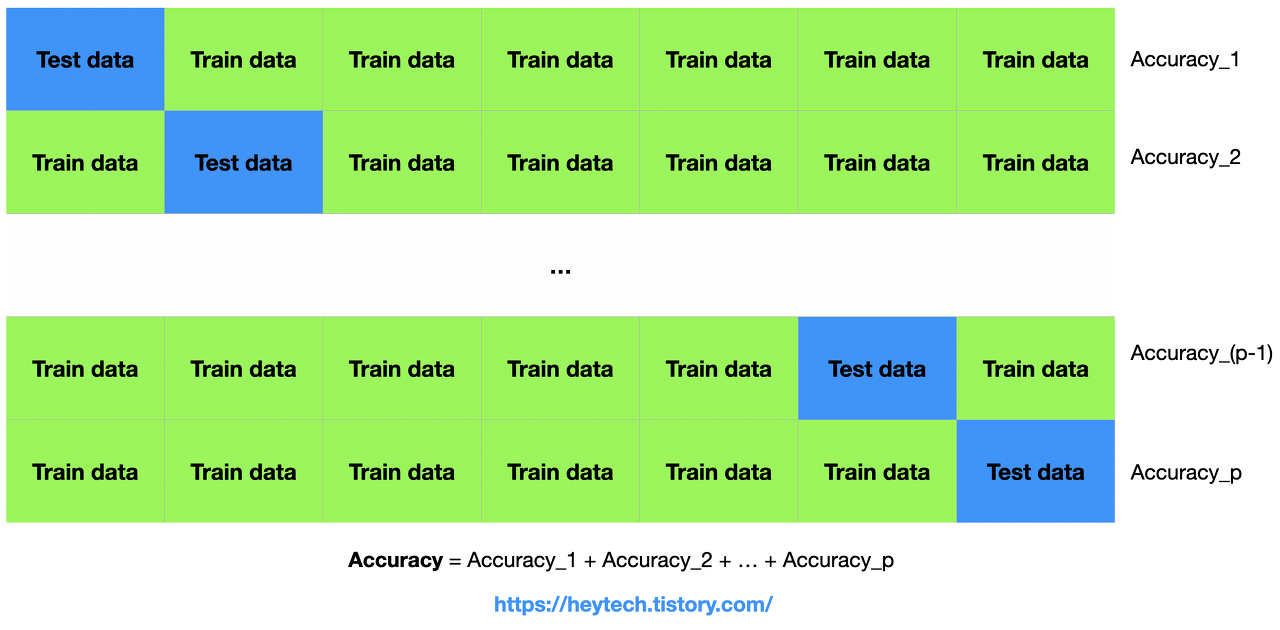

#### 정의
- LpOCV에서 p=1 인 경우에 해당
- K-fold CV에서 K=N인 경우에 해당
- 훈련/검증 iteration 횟수(test data 조합 개수) = 전체 데이터 개수 = N회

#### 특징
- LpOCV보다 연산 소요시간 적음
- Test data가 단 1개이고 나머지 모든 데이터를 train에 활용 가능 → 학습 모델 성능 우수
- 데이터 개수가 적은 경우 효과적인 방법론
- ✅ LpOCV보다 선호되는 방법론

## [원본 소스]교차 검증

In [29]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00999856, 0.00900102, 0.00999475, 0.00900269, 0.00899601]), 'score_time': array([0.00099945, 0.00200343, 0.00100374, 0.00099468, 0.00200272]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [30]:
import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


In [31]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [32]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


## 하이퍼파라미터 튜닝

In [33]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [34]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [35]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [36]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [37]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [38]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [39]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [40]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [41]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [42]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [43]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


### 랜덤 서치

In [44]:
from scipy.stats import uniform, randint

In [45]:
rgen = randint(0, 10)
rgen.rvs(10)

array([7, 1, 9, 8, 0, 2, 9, 8, 1, 5], dtype=int64)

In [46]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([102, 107, 109,  86, 102, 107,  97,  80, 120,  90], dtype=int64))

In [47]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.84495884, 0.42978682, 0.03770132, 0.60786936, 0.22406599,
       0.94502018, 0.22910711, 0.97620568, 0.26495293, 0.68034078])

In [48]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [49]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FEBA149790>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FEB9E77910>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FEBA149AF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FEB9FC7340>},
                   random_state=42)

In [50]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [51]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [52]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.86


## 확인문제

In [53]:
gs = RandomizedSearchCV(DecisionTreeClassifier(splitter='random', random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FEBA149790>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FEB9E77910>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FEBA149AF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FEB9FC7340>},
                   random_state=42)

In [54]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

{'max_depth': 43, 'min_impurity_decrease': 0.00011407982271508446, 'min_samples_leaf': 19, 'min_samples_split': 18}
0.8458726956392981
0.786923076923077
